# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset=pd.read_csv(r"C:\Users\KUNAL\Documents\Deep_Learning\Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X=dataset.iloc[:,3:-1]
Y=dataset.iloc[:,-1]

In [9]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [10]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Taking care of missing values

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X.iloc[:,3:-1])
X.iloc[:,3:-1] = imputer.transform(X.iloc[:,3:-1])
# X.iloc[:,3:-1]=imputer.fit_transform(X.iloc[:,3:-1])

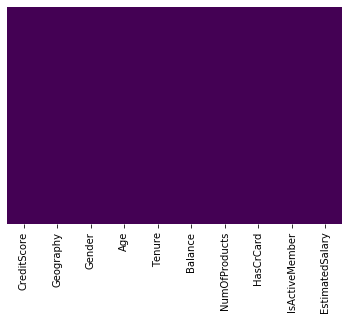

In [12]:
#See if there exist any null values or not
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:, 2] = le.fit_transform(X.iloc[:, 2])

In [14]:
print(X)

      CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0             619    France       0  42.0     2.0       0.00            1.0   
1             608     Spain       0  41.0     1.0   83807.86            1.0   
2             502    France       0  42.0     8.0  159660.80            3.0   
3             699    France       0  39.0     1.0       0.00            2.0   
4             850     Spain       0  43.0     2.0  125510.82            1.0   
...           ...       ...     ...   ...     ...        ...            ...   
9995          771    France       1  39.0     5.0       0.00            2.0   
9996          516    France       1  35.0    10.0   57369.61            1.0   
9997          709    France       0  36.0     7.0       0.00            1.0   
9998          772   Germany       1  42.0     3.0   75075.31            2.0   
9999          792    France       0  28.0     4.0  130142.79            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  


One Hot Encoding the "Geography" column

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# 1-belongs to row 1

#Another way:Make dummy variables
#onehotencoder = OneHotEncoder(categorical_features = [2])
#X = onehotencoder.fit_transform(X).toarray()
#X


In [16]:
print(X)
# 0 for spain & france
#1 for germany

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


### Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# we do not apply fit so as to avoid info leakage from test set
# Fit- computes the mean & st deviation 
# Transform- uses the previous measures to autoscale the data.

## Part 2 - Building the ANN

### Initializing the ANN

In [10]:
# Create a variable ann as the object of Sequential class
# Sequential class is taken from models module from keris library (tf calls keras calls models calls Sequential model)
ann=tf.keras.models.Sequential()


### Adding the input layer and the first hidden layer

In [ ]:
# tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element
-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer,
and bias is a bias vector created by the layer (only applicable if use_bias is True).

In [11]:
# add & drop(for overfitting) is a method where keras calls the dense class 
# the dense class creates the fully connected layer where it automatically add the input layer
# inside our Dense class Unit=no. of neurons(in dense fn we only specify how much hidden neuron's needed,activation fn=rectifier for hidden layer & sigmoid for output layer)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

### Adding the output layer

In [13]:
# add methods add any one neuron to our model units=1 as we need only one neuron to predict the values as 1 or 0
# but for multi classification i.e is abc we need three neuron's as there is no relationship order btw these 
#a-001,b=010,c=001
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# sigmoid gives better prediction's than threshold's fn as it gives the probability that binary outcome is 1

## Part 3 - Training the ANN

### Compiling the ANN

In [14]:
# Optimiser performs SGD by adam to update the weights in each iteration's and reduce the loss i.e cost function
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Binary class:binary_crossentropy , multi class:categorical_crossentropy - loss/probabilistic metrics,regression-mean_squared_error

### Training the ANN on the Training set

In [15]:
# For training ann enter 2 para 1. batch_size=32
ann.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8076
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8183
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8194
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8241
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8263
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.8334
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8385
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3816 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [25]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) )
#0.03 that the customer has the lower probability to leave the bank

[[0.01335871]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [18]:
#call predict method
Y_pred=ann.predict(X_test)
Y_pred=(Y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
pd.DataFrame(data={'predictions': Y_pred, 'actual': Y_test})

### Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)*100


[[1522   73]
 [ 199  206]]


86.4

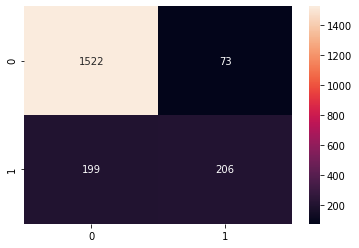

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt = "d")
plt.savefig("confusion_matrix.png")

In [ ]:
import numpy as np
from ann_visualizer.visualize import ann_viz
# fix random seed for reproducibility
np.random.seed(7)
#saving the model architecture in pdf form
ann_viz(ann, view=True, filename='Deep_Learning.gv', title='Model Visualization')